<a href="https://colab.research.google.com/github/kairamilanifitria/Thesis/blob/main/TESTING_TRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ROUGE ##

In [54]:
pip install rouge rouge_score evaluate

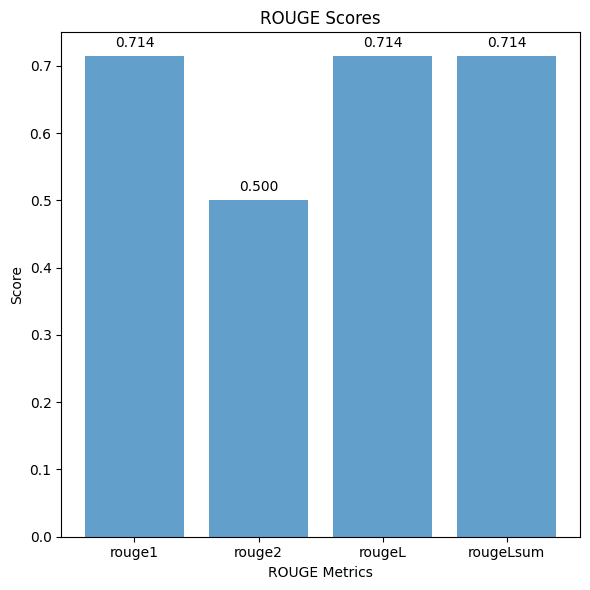

{'rouge1': 0.7142857142857143, 'rouge2': 0.5, 'rougeL': 0.7142857142857143, 'rougeLsum': 0.7142857142857143}


In [56]:
import matplotlib.pyplot as plt
import evaluate
rouge = evaluate.load("rouge")

def visualize_rouge_scores(rouge_scores):
    metrics = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
    scores = [rouge_scores[metric] for metric in metrics]

    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the figure size
    bars = plt.bar(metrics, scores, alpha=0.7)
    plt.title('ROUGE Scores')
    plt.xlabel('ROUGE Metrics')
    plt.ylabel('Score')

    for i, score in enumerate(scores):
        plt.text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Example usage:
generated_text = ["This is a sample generated text."]
reference_text = ["This is a sample reference text for testing."]
rouge_scores = rouge.compute(predictions=generated_text, references=reference_text)

visualize_rouge_scores(rouge_scores)
print(rouge_scores)


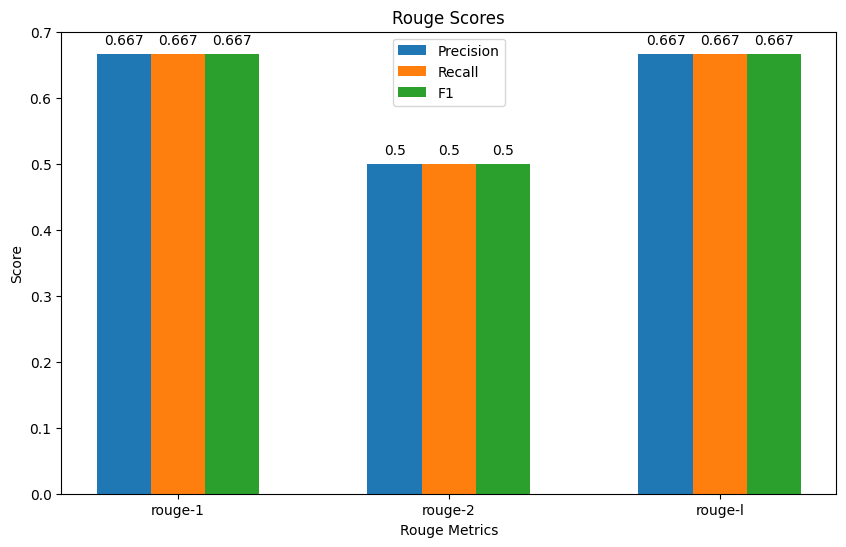

{'rouge-1': {'r': 0.6666666666666666, 'p': 0.6666666666666666, 'f': 0.6666666616666668}, 'rouge-2': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}, 'rouge-l': {'r': 0.6666666666666666, 'p': 0.6666666666666666, 'f': 0.6666666616666668}}


In [57]:
import matplotlib.pyplot as plt
from rouge import Rouge
rouge = Rouge()

def visualize_rouge_scores(rouge_scores):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']
    precision = [rouge_scores[metric]['p'] for metric in metrics]
    recall = [rouge_scores[metric]['r'] for metric in metrics]
    f1 = [rouge_scores[metric]['f'] for metric in metrics]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.2
    bar1 = ax.bar(range(len(metrics)), precision, width, label='Precision')
    bar2 = ax.bar([i + width for i in range(len(metrics))], recall, width, label='Recall')
    bar3 = ax.bar([i + 2 * width for i in range(len(metrics))], f1, width, label='F1')

    ax.set_title('Rouge Scores')
    ax.set_xlabel('Rouge Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width for i in range(len(metrics))])
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate bars with values
    for bars in [bar1, bar2, bar3]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

    plt.show()

# Example usage:
references = ["Reference text 1", "Reference text 2", "Reference text 3"]
predictions_rag = ["Generated text 1", "Generated text 2", "Generated text 3"]

rouge_scores = rouge.get_scores(references, predictions_rag, avg=True)
visualize_rouge_scores(rouge_scores)
print(rouge_scores)


## BERTScore ##

In [59]:
pip install transformers bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


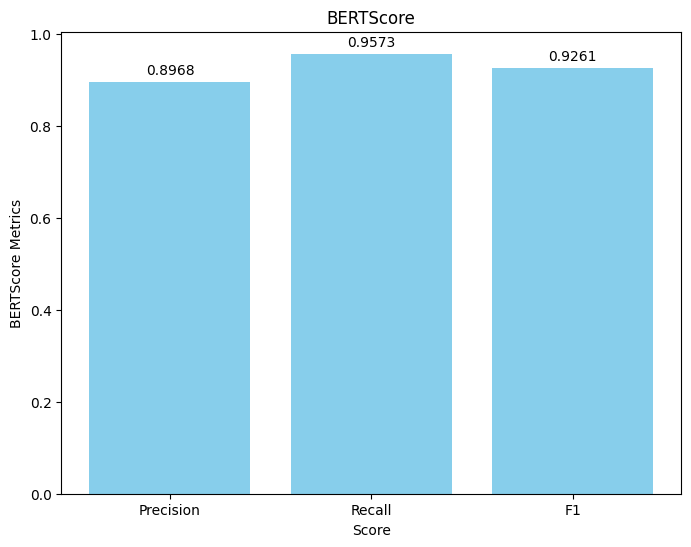

In [63]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Example usage:
references = ["Reference text 1", "Reference text 2", "Reference text 3"]
predictions_rag = ["Generated text 1", "Generated text 2", "Generated text 3"]

# Calculate BERTScore precision, recall, and F1-score dynamically
scorer = BERTScorer(model_type='roberta-large')
P, R, F1 = scorer.score(predictions_rag, references)

def visualize_bert_score(precision, recall, f1):
    metrics = ['Precision', 'Recall', 'F1']
    scores = [precision.mean(), recall.mean(), f1.mean()]

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(range(len(metrics)), scores, color='skyblue')
    ax.set_title('BERTScore')
    ax.set_xlabel('Score')
    ax.set_ylabel('BERTScore Metrics')
    ax.set_xticks([i for i in range(len(metrics))])
    ax.set_xticklabels(metrics)

    # Annotate bars with values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

# Example usage:
visualize_bert_score(P, R, F1)
